Importing the Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [15]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Data import

In [16]:
airline_data = pd.read_csv("data/test.csv")
airline_data.head(6)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


# Data Cleanup

In [17]:
columns_to_drop = ['Unnamed: 0', 'id']
airline_data = airline_data.drop(columns=columns_to_drop, axis=1)
airline_data.head(6)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


I dropped unecessary colomns such as id and numeric-index

In [18]:
print(airline_data.shape)
print(airline_data.dtypes)

(25976, 23)
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float6

In [19]:
airline_data.isnull().values.any()

True

In [20]:
airline_data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Over here, I can see that there are some null values for Arrival delay in minutes. Normally we would remove all null rows, but intuition suggests that null might equal to 0 or no delay. So, I performed a data check, but after checking the data, it was found that there are indeed some values where 0 was written. Therefore Null does not necessarily equal 0. Therefore, since kaggle does not have the right data information provided, those rows with null values, needs to be dropped.

In [21]:
airline_data = airline_data.dropna(subset=['Arrival Delay in Minutes'])
airline_data.isnull().values.any()

False

The data is now clean, now I will divide the features and the label, in different data-frames, to be used later

In [22]:
airline_features = airline_data.iloc[:,0:22] # Independent variables
airline_satisfaction = airline_data['satisfaction'] # Outcome variable
airline_features.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [23]:
airline_satisfaction.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

The data has been cleaned now

# Exploratory Data Analysis

The central goal for EDA would be to examine the overall dataset and perform feature reduction and data inspection, to build a clean model. To perform this, I will follow the following steps, in this order to get the best result:

## Analysis for Target

<Axes: xlabel='satisfaction', ylabel='count'>

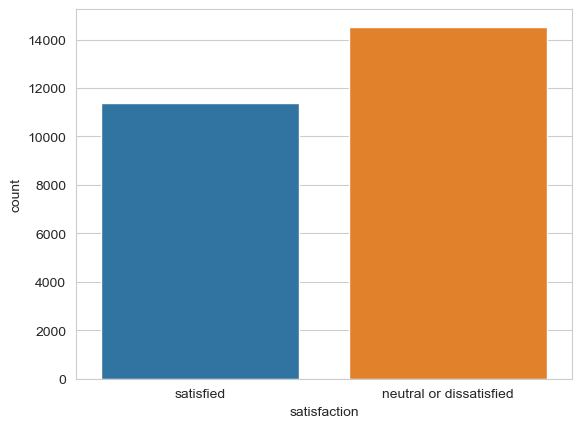

In [24]:
sns.countplot(x='satisfaction', data=airline_data)

This plot reveals that the final outcome variable of satisfaction is almost equally distributed. Therefore, no new false dummy value creation of sorts is required

## Univariate Analysis

Goal: I will examine each feature individually to understand its distribution, variability, and potential for feature reduction.

### "Continuous Numerical Features" Data Analysis

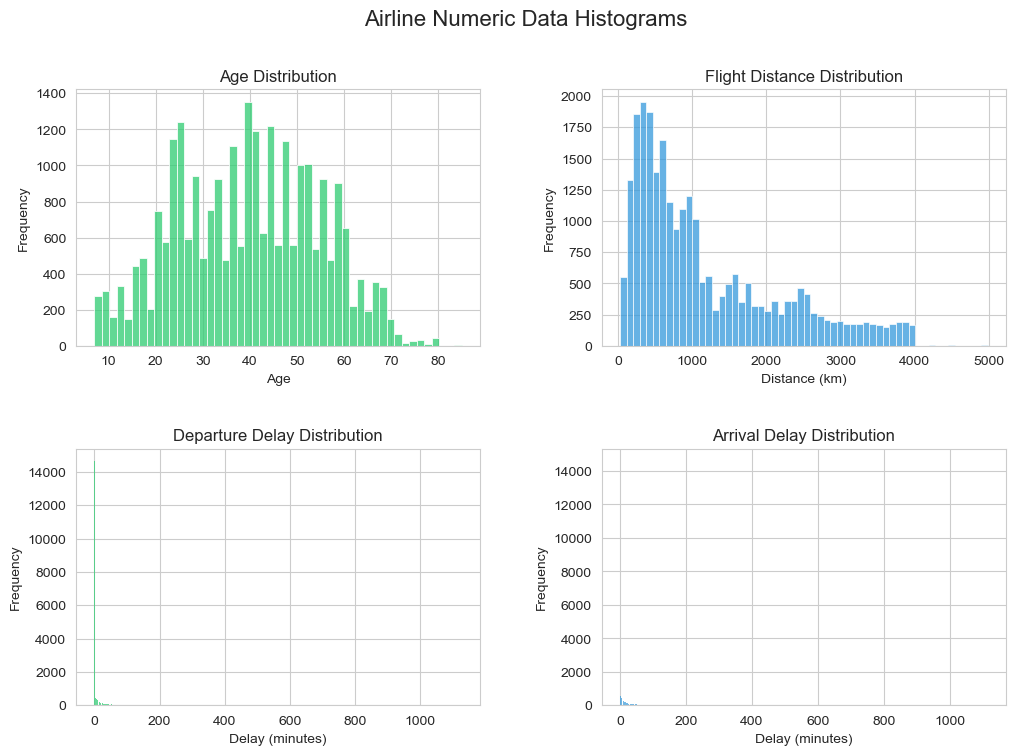

In [27]:
# Set a more visually appealing theme
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.histplot(airline_data['Age'], color='#2ecc71', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(airline_data['Flight Distance'], color='#3498db', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Flight Distance Distribution')
axes[0, 1].set_xlabel('Distance (km)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(airline_data['Departure Delay in Minutes'], color='#2ecc71', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Departure Delay Distribution')
axes[1, 0].set_xlabel('Delay (minutes)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(airline_data['Arrival Delay in Minutes'], color='#3498db', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Arrival Delay Distribution')
axes[1, 1].set_xlabel('Delay (minutes)')
axes[1, 1].set_ylabel('Frequency')

fig.suptitle('Airline Numeric Data Histograms', fontsize=16)

# Show the plot
plt.show()


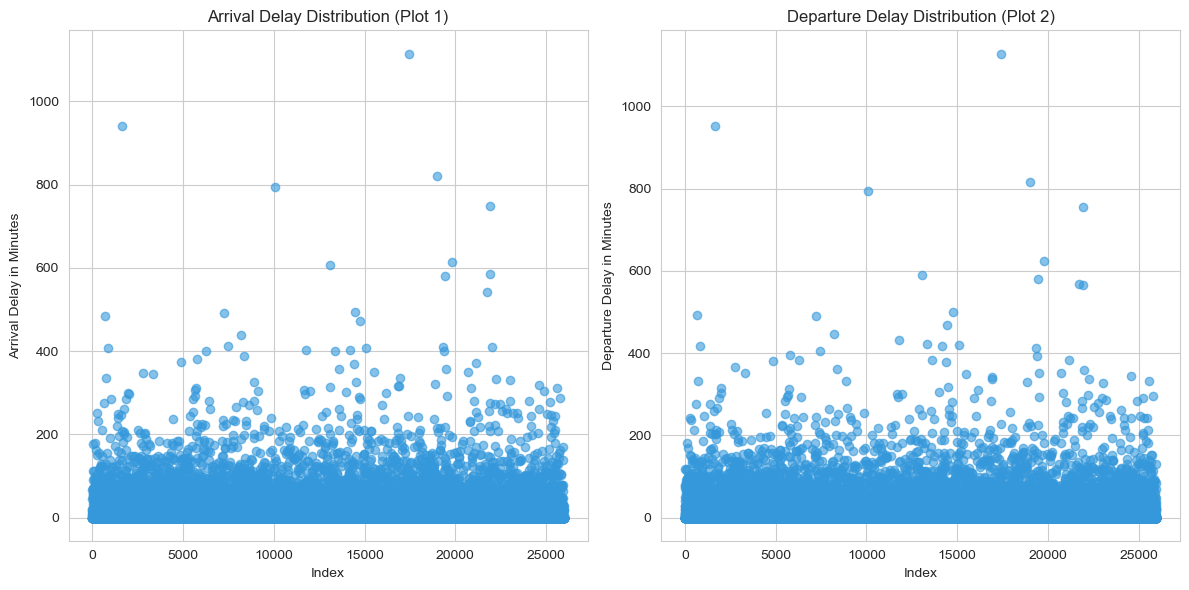

In [28]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Use axes[0] and axes[1] to call scatter on each subplot
axes[0].scatter(x=airline_data.index, y=airline_data['Arrival Delay in Minutes'], color='#3498db', alpha=0.6)
axes[0].set_title('Arrival Delay Distribution (Plot 1)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Arrival Delay in Minutes')

axes[1].scatter(x=airline_data.index, y=airline_data['Departure Delay in Minutes'], color='#3498db', alpha=0.6)
axes[1].set_title('Departure Delay Distribution (Plot 2)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Departure Delay in Minutes')

# Adjust spacing between the plots
plt.tight_layout()

# Show the plot
plt.show()


### "Discrete Numerical Features" Data Analysis

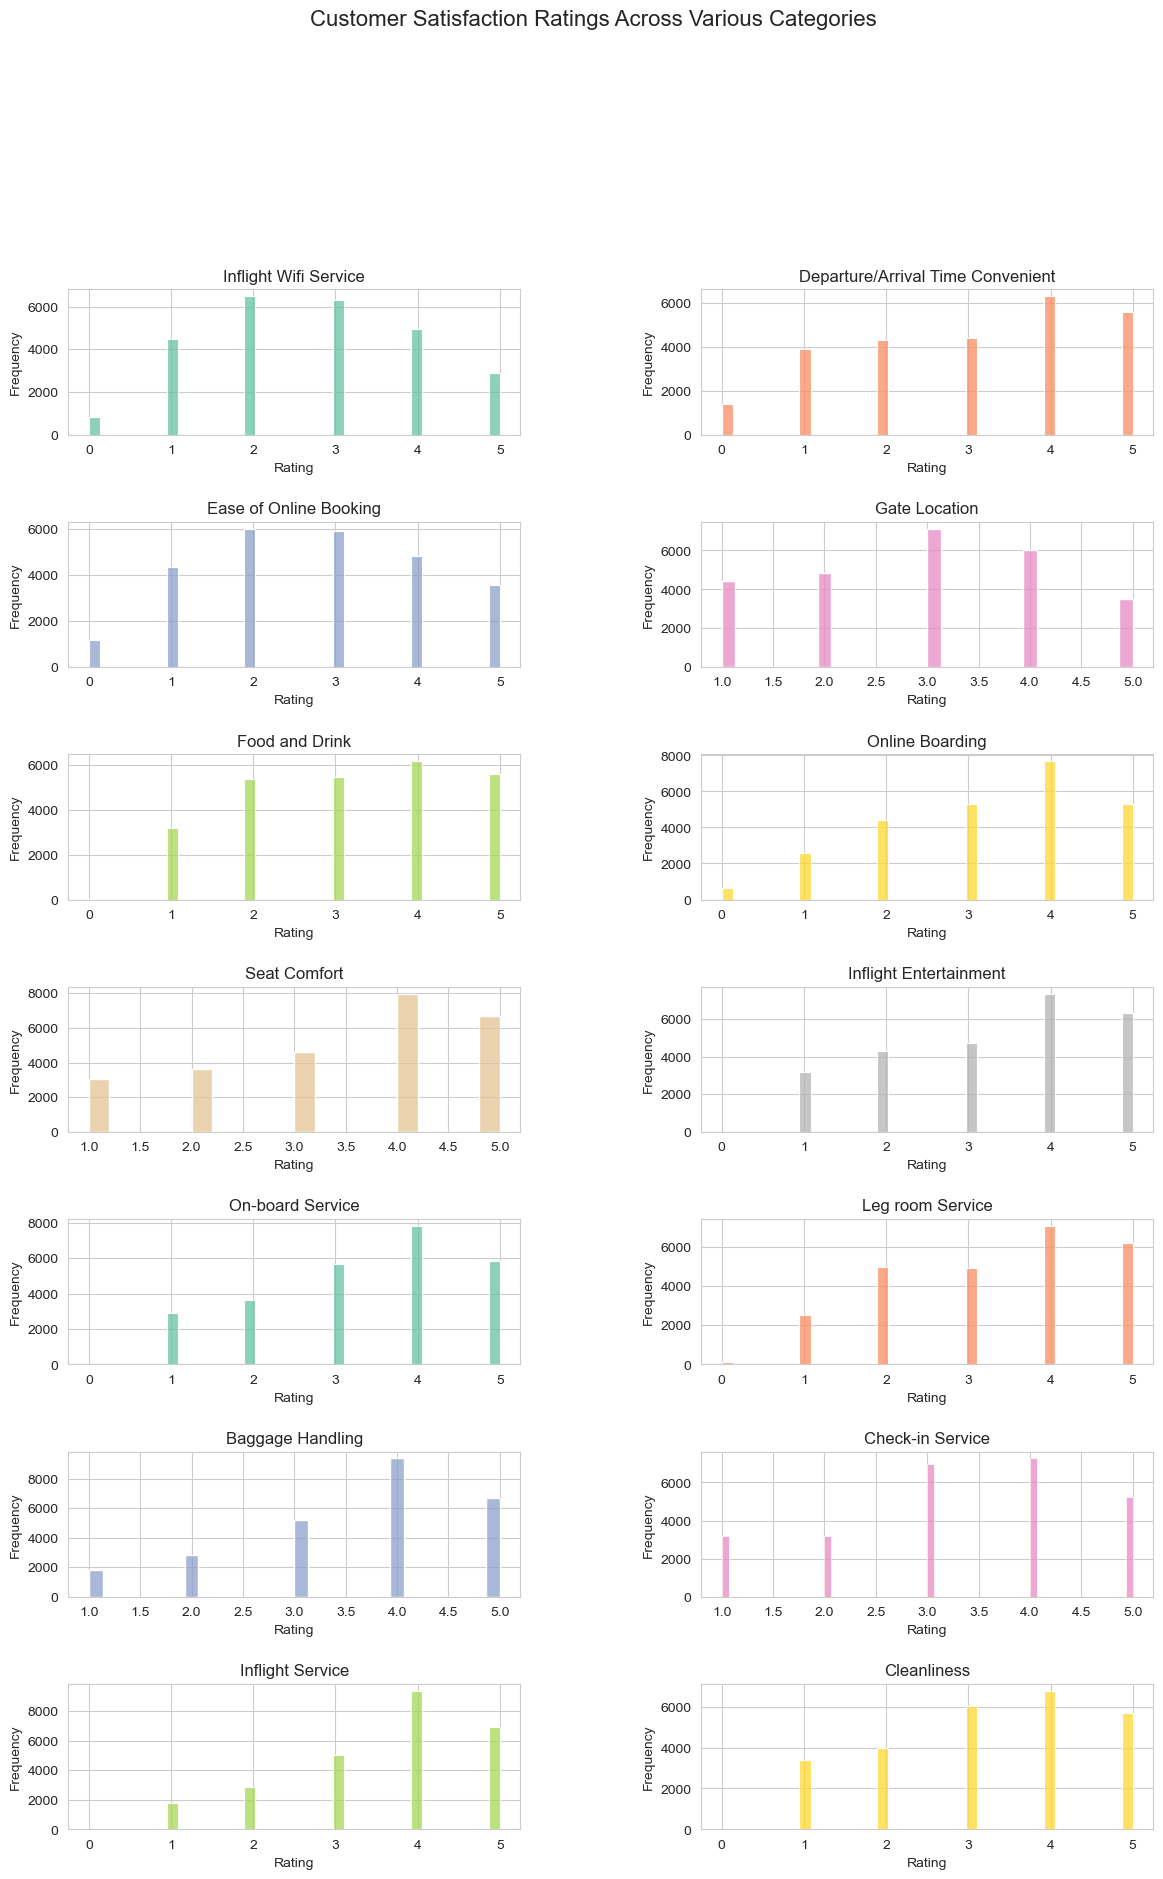

In [36]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
palette = sns.color_palette("Set2")

# List of attributes to plot and their titles
attributes = [
    ('Inflight wifi service', 'Inflight Wifi Service'),
    ('Departure/Arrival time convenient', 'Departure/Arrival Time Convenient'),
    ('Ease of Online booking', 'Ease of Online Booking'),
    ('Gate location', 'Gate Location'),
    ('Food and drink', 'Food and Drink'),
    ('Online boarding', 'Online Boarding'),
    ('Seat comfort', 'Seat Comfort'),
    ('Inflight entertainment', 'Inflight Entertainment'),
    ('On-board service', 'On-board Service'),
    ('Leg room service', 'Leg room Service'),
    ('Baggage handling', 'Baggage Handling'),
    ('Checkin service', 'Check-in Service'),
    ('Inflight service', 'Inflight Service'),
    ('Cleanliness', 'Cleanliness')
]

# Loop through each attribute and corresponding axis to plot
for i, (attr, title) in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.histplot(airline_data[attr], color=palette[i % len(palette)], fill=True, ax=axes[row][col])
    axes[row][col].set_title(title)
    axes[row][col].set_xlabel('Rating')
    axes[row][col].set_ylabel('Frequency')

fig.suptitle('Customer Satisfaction Ratings Across Various Categories', fontsize=16, y=1.02)
plt.show()
